In [ ]:
pwd

'/content'

In [ ]:
cd drive/MyDrive/LING

/content/drive/MyDrive/LING


In [ ]:
!git clone https://github.com/iminoso/ENGL-108P.git

fatal: destination path 'ENGL-108P' already exists and is not an empty directory.


In [ ]:
ls

 ENGL-108P/  'LING571 FINAL PROJECT.ipynb'


In [ ]:
cd ENGL-108P/

/content/drive/MyDrive/LING/ENGL-108P


In [ ]:
ls

dataset/       grammar.py    ngram.py                relations.py
dispersion.py  locations.py  outputs/                sentiment.py
excel_files/   names.py      pos_tagging_legend.txt  spells.py


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

Book 1
Book 2
Book 3
Book 4
Book 5
Book 6
Book 7


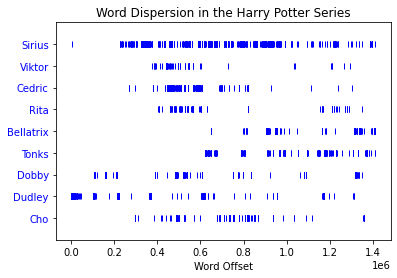

In [ ]:
import os
import json

character_counter = dict()
b = []
books = list([1, 2, 3, 4, 5, 6, 7])
entire_text = ''
for i in books:
    print('Book {}'.format(i))
    book_name = "book_%s.txt" % (str(i))
    book = open(os.path.join('dataset', "book_%s.txt" % (str(i)))).read()
    b.append(book)
    entire_text += book

tokens = nltk.word_tokenize(entire_text)
mytext = nltk.Text(tokens)
words = [
    "Sirius", "Viktor", "Cedric", "Rita",
    "Bellatrix", "Tonks", "Dobby", "Dudley", "Cho"
]
nltk.draw.dispersion.dispersion_plot(
    mytext, words, ignore_case=False,
    title='Word Dispersion in the Harry Potter Series'
)

In [ ]:
entire_text[:100]

'Harry Potter and the Sorcerer’s Stone\n\n\n\nby\n\nJ. K. Rowling\n\nIllustrations By Mary Grandpré\n\n\n\nArthur'

In [ ]:
import nltk
import os
# from pattern.en import sentiment
import unicodedata
import json

books = list([1, 2, 3, 4, 5, 6, 7])

# books = [1, 2, 3, 4]
book_names = [
    'Philosopher\'s Stone',
    'Chamber of Secrets',
    'Prisoner of Azkaban',
    'Goblet of Fire',
    'Order of the Phoenix',
    'Half-Blood Prince',
    'Deathly Hallows'
]
count = {}
pos_type = 'VB'
for i in books:
    book_name = "book_%s.txt" % (str(i))
    print(book_name)
    book = open(os.path.join('dataset', "book_%s.txt" % (str(i)))).read()
    book = book.lower()
    words_tokens = nltk.word_tokenize(book)
    pos_text = nltk.pos_tag(words_tokens)
    for word in nltk.pos_tag(words_tokens):
        text, text_type = word
        # decode
        text = unicodedata.normalize('NFKD', text).replace('\n\n', ' ')
        if text in count and text_type == pos_type:
            count[text] += 1
        else:
            count[text] = 1

print(sorted(count.items(), key=lambda item: item[1]))

# print json.dumps(
#     most_neg_sent, sort_keys=True, indent=2
# )
# print "{},{},{},{}".format(
#     book_names[i - 1],
#     (count['neut'] / float(len(sent_tokens))),
#     (count['pos'] / float(len(sent_tokens))),
#     (count['neg'] / float(len(sent_tokens)))
# )

book_1.txt
book_2.txt
book_3.txt
book_4.txt
book_5.txt
book_6.txt
book_7.txt
[('harry', 1), ('potter', 1), ('and', 1), ('the', 1), ('sorcerer', 1), ('’', 1), ('s', 1), ('stone', 1), ('by', 1), ('j.', 1), ('k.', 1), ('rowling', 1), ('illustrations', 1), ('mary', 1), ('grandpré', 1), ('arthur', 1), ('a.', 1), ('levine', 1), ('books', 1), ('an', 1), ('imprint', 1), ('of', 1), ('scholastic', 1), ('.', 1), ('for', 1), (',', 1), ('who', 1), ('loves', 1), ('stories', 1), ('loved', 1), ('them', 1), ('too', 1), (';', 1), ('di', 1), ('heard', 1), ('this', 1), ('one', 1), ('first', 1), ('text', 1), ('copyright', 1), ('©', 1), ('1997', 1), ('j.k.', 1), ('1998', 1), ('warner', 1), ('bros.', 1), ('all', 1), ('rights', 1), ('reserved', 1), ('published', 1), ('a', 1), ('division', 1), ('inc.', 1), ('publishers', 1), ('since', 1), ('1920', 1), ('lantern', 1), ('logo', 1), ('are', 1), ('trademarks', 1), ('and/or', 1), ('registered', 1), ('related', 1), ('characters', 1), ('elements', 1), ('no', 1), ('p

In [ ]:
import nltk
import os
from nltk.util import ngrams
import pandas as pd

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')


character_counter = dict()
df=pd.DataFrame()
df['Books']=['book1','book2','book3','book4','book5','book6','book7']
books = list([1, 2, 3, 4, 5, 6, 7])
l1,l2,l3,l4,l5,l6=[],[],[],[],[],[]
for i in books:
    # print 'Book {}'.format(i)
    book_name = "book_%s.txt" % (str(i))
    book = open(os.path.join('dataset', "book_%s.txt" % (str(i)))).read().lower()
    l1.append(book.count('privet drive'))
    l2.append(book.count('diagon alley'))
    l3.append(book.count('hogwarts'))
    l4.append(book.count('azkaban'))
    l5.append(book.count('ministry of magic'))
    l6.append(book.count('grimmauld place'))
    print(book.count('privet drive'), book.count('diagon alley'), book.count('hogwarts'), book.count('azkaban'), book.count('ministry of magic'), book.count('grimmauld place'))

df['privet drive'] = l1
df['diagon alley'] =l2
df['hogwarts']=l3
df['azkaban']=l4
df['ministry of magic']=l5
df['grimmauld place']=l6

16 8 74 0 5 0
7 4 91 9 5 0
9 11 89 46 24 0
16 5 173 37 28 0
24 7 150 40 64 30
7 13 121 23 15 6
7 8 134 18 7 19


In [ ]:
df.head(7)

,Books,privet drive,diagon alley,hogwarts,azkaban,ministry of magic,grimmauld place
0,book1,16,8,74,0,5,0
1,book2,7,4,91,9,5,0
2,book3,9,11,89,46,24,0
3,book4,16,5,173,37,28,0
4,book5,24,7,150,40,64,30
5,book6,7,13,121,23,15,6
6,book7,7,8,134,18,7,19


In [ ]:
# mkdir ./excel_files

mkdir: cannot create directory ‘./excel_files’: File exists


In [ ]:
df.to_excel('./excel_files/count.xlsx', index=False)


In [ ]:
df.head(7)

,Books,privet drive,diagon alley,hogwarts,azkaban,ministry of magic,grimmauld place
0,book1,16,8,74,0,5,0
1,book2,7,4,91,9,5,0
2,book3,9,11,89,46,24,0
3,book4,16,5,173,37,28,0
4,book5,24,7,150,40,64,30
5,book6,7,13,121,23,15,6
6,book7,7,8,134,18,7,19


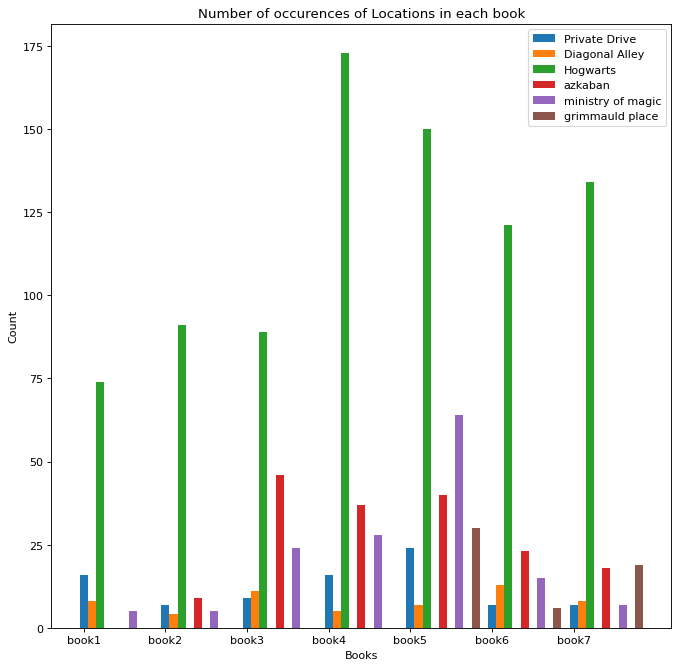

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10), dpi=80)
X = ['book1','book2','book3','book4', 'book5', 'book6', 'book7']

privateDrive= [16, 7, 9, 16, 24, 7, 7]
diagonalAlley = [8, 4, 11, 5, 7, 13, 8]
Hogwarts=l3
azkaban	=l4
ministry_of_magic	=l5
grimmauld_place=l6

X_axis = np.arange(len(privateDrive))
w=0.1
plt.bar(X_axis , privateDrive, 0.1, label = 'Private Drive')
plt.bar(X_axis + w, diagonalAlley, 0.1, label = 'Diagonal Alley')
plt.bar(X_axis + w*2, Hogwarts, 0.1, label = 'Hogwarts')
plt.bar(X_axis + w*4, azkaban	, 0.1, label = 'azkaban')
plt.bar(X_axis + w*6, ministry_of_magic, 0.1, label = 'ministry of magic')
plt.bar(X_axis + w*8, grimmauld_place, 0.1, label = 'grimmauld place')

plt.xticks(X_axis, X)
plt.xlabel("Books")
plt.ylabel("Count")
plt.title("Number of occurences of Locations in each book")
plt.legend()
plt.show()


In [ ]:
l2

In [ ]:
import nltk
import os
import json

character_counter = dict()

# books = list([1, 2, 3, 4, 5, 6, 7])
books = list([1])
for i in books:
    print('Book {}'.format(i))
    output_file = open('outputs/names_count_book_' + str(i) + '.txt', 'w+')
    book_name = "book_%s.txt" % (str(i))
    book = open(os.path.join('dataset', "book_%s.txt" % (str(i)))).read()
    for sentences in nltk.sent_tokenize(book):
        for chunked in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentences))):
            #            print chunked, chunked[0], type(chunked), len(chunked)
            if type(chunked) is not tuple:
                name = ' '.join(leaf[0] for leaf in chunked.leaves())
                if name in character_counter:
                    # print('counting')
                    character_counter[name] += 1
                else:
                    character_counter[name] = 1
    # print >>output_file, 
json.dumps(character_counter, sort_keys=True, indent=2)

Book 1


'{\n  "AAAAAAAAAAARGH": 1,\n  "ALBUS": 1,\n  "ALBUS DUMBLEDORE": 2,\n  "ALL": 1,\n  "Aaah": 1,\n  "Abbott": 1,\n  "Abou": 1,\n  "Adalbert": 1,\n  "Add": 1,\n  "Adrian Pucey": 2,\n  "Africa": 1,\n  "African": 1,\n  "Ages": 4,\n  "Agrippa": 2,\n  "Ah": 2,\n  "Ahead": 1,\n  "Ahem": 2,\n  "Alberic Grunnion": 1,\n  "Albus": 4,\n  "Albus Dumbledore": 5,\n  "Algie": 1,\n  "Alicia Spinnet": 1,\n  "All": 3,\n  "All Occasions": 1,\n  "Alley": 1,\n  "Always": 1,\n  "American": 1,\n  "And": 1,\n  "Angelina": 2,\n  "Angelina Johnson": 1,\n  "Anne": 1,\n  "Anyone": 2,\n  "Anyway": 1,\n  "Are": 1,\n  "Aren": 1,\n  "Argus Filch": 1,\n  "Arsenius Jigger Fantastic Beasts": 1,\n  "Astronomy": 1,\n  "Astronomy Tower": 2,\n  "Aunt": 10,\n  "Aunt Petunia": 40,\n  "Aunt Petu\\u00adnia": 1,\n  "Auntie Marge": 1,\n  "BED": 1,\n  "BOOKS": 1,\n  "BOOM": 1,\n  "BROOMSTICKS": 1,\n  "Bad": 1,\n  "Bane": 15,\n  "Barn": 1,\n  "Baron": 2,\n  "Bathilda Bagshot Magical": 1,\n  "Beaters": 2,\n  "Befuddle": 1,\n  "Bell": 

In [ ]:
# import nltk
# import os
# from nltk.util import ngrams


# character_counter = dict()

# # books = list([1, 2, 3, 4, 5, 6, 7])
# count = 0
# books = [1]
# for i in books:
#     print('Book {}'.format(i))
#     book_name = "book_%s.txt" % (str(i))
#     book = open(os.path.join('dataset', "book_%s.txt" % (str(i)))).read()

#     tokens = nltk.word_tokenize(book)

#     for t in tokens:
#         # print(t)

#     # str_bigrams = ngrams(tokens, 3)
#     # ctr = 0
#     # for gram in str_bigrams:
#     #     ctr += 1
#     #     g = [str(x.encode('utf-8')) for x in gram]
#     #     if "Ron" in g and "Hermione" in g:
#     #         print g, gram, ctr
#     #         count += 1
#       print(count)

In [ ]:
# import nltk
# import os
# import copy
# import json

# character_counter = dict()
# list_of_slices = []
# adding_to_slices = []
# rolling_words = []

# output_file = open('/content/drive/MyDrive/LING/ENGL-108P/outputs/relations.txt', 'w+')

# # books = list([1, 2, 3, 4, 5, 6, 7])
# books = [1]
# ctr = 0
# for i in books:
#     print('Book {}'.format(i))
#     book_name = "book_%s.txt" % (str(i))
#     book = open(os.path.join('/content/drive/MyDrive/LING/ENGL-108P/dataset',"book_%s.txt" % (str(i)))).read()

#     tokens = nltk.word_tokenize(book)

#     for t in tokens:
#         word = str(t.encode('utf-8'))

#         for i, word_slice in enumerate(adding_to_slices):
#             if len(word_slice[0]) == 100:
#                 if word_slice[1]:
#                     list_of_slices.append(word_slice[0])
#             else:
#                 adding_to_slices[i][0].append(word)

#         if len(rolling_words) < 50:
#             rolling_words.append(word)
#         else:
#             rolling_words.pop(0)
#             rolling_words.append(word)

#         if 'Harry' in word:
#             word_slice = []
#             word_slice = rolling_words + ['Harry']
#             adding_to_slices.append([word_slice, True])

# # print >>output_file, 
# json.dumps(list_of_slices, sort_keys=True, indent=2)

In [ ]:
!pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 1.2 MB/s 
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 81 kB 9.7 MB/s 
     |████████████████████████████████| 5.6 MB 62.4 MB/s 
     |████████████████████████████████| 5.6 MB 50.7 MB/s 
     |████████████████████████████████| 348 kB 69.6 MB/s 
     |████████████████████████████████| 100 kB 10.8 MB/s 
     |████████████████████████████████| 4.0 MB 50.6 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332722 sha256=ad238f64d2e5b199e42680d974641e4bd6746102319eca48874a1283eadde159
  Stored in directory: /root/.cache/pip/wheels/ec/ce/8f/bccc2d04f3a25a5a1dd19165b2855ad3203975f25edd5838d6
  Created wheel for mysqlclient: filename=mysqlclient-2.1.1-cp38-cp38-linux_x86_64.whl size=102397 sha256=f0bfba2179bf4024fdb22b0c7959f1b3e22a17b7e63f9165b3e98eab17f9711e
  Stored i

In [ ]:
from pattern.en import sentiment

In [ ]:
import nltk
import os
from pattern.en import sentiment
import unicodedata
import json


character_counter = dict()

books = list([1, 2, 3, 4, 5, 6, 7])
# entire_text = ''
# books = [2]
book_names = [
    'Philosopher\'s Stone',
    'Chamber of Secrets',
    'Prisoner of Azkaban',
    'Goblet of Fire',
    'Order of the Phoenix',
    'Half-Blood Prince',
    'Deathly Hallows'
]
for i in books:
    book_name = "book_%s.txt" % (str(i))
    book = open(os.path.join('dataset', "book_%s.txt" % (str(i)))).read()
    # entire_text += book

    most_neg = 1
    most_neg_sent = []
    sent_tokens = nltk.sent_tokenize(book)
    count = {'pos': 0, 'neg': 0, 'neut': 0}
    for index, s in enumerate(sent_tokens):
        sentence = unicodedata.normalize('NFKD', s).replace('\n\n', ' ')
        polarity, subjectivity = sentiment(sentence)

        if polarity > 0:
            count['pos'] += 1
        elif polarity < 0:
            count['neg'] += 1
        else:
            count['neut'] += 1

        if polarity < most_neg:
            most_neg = polarity
            most_neg_sent = [(sentence, polarity, subjectivity)]
        elif polarity == most_neg:
            most_neg_sent.append((sentence, polarity, subjectivity))
    print(json.dumps(
        most_neg_sent, sort_keys=True, indent=2
    ))
    print("{},{},{},{}".format(
        book_names[i - 1],
        (count['neut'] / float(len(sent_tokens))),
        (count['pos'] / float(len(sent_tokens))),
        (count['neg'] / float(len(sent_tokens)))
    ))

[
  [
    "\u201cHe always sp-spoils everything!\u201d He shot Harry a nasty grin through the gap in his mothers arms.",
    -1.0,
    1.0
  ],
  [
    "\u201cThis is boring,\u201d Dudley moaned.",
    -1.0,
    1.0
  ],
  [
    "Weather\u2019s horrible.",
    -1.0,
    1.0
  ],
  [
    "Horribly.",
    -1.0,
    1.0
  ],
  [
    "\u201cWhat are they like?\u201d \u201cHorrible \u2014 well, not all of them.",
    -1.0,
    1.0
  ],
  [
    "\u201cYes,\u201d said the boy miserably.",
    -1.0,
    1.0
  ],
  [
    "Fred said it hurts a lot, but I think he was joking.\u201d Harry\u2019s heart gave a horrible jolt.",
    -1.0,
    1.0
  ],
  [
    "\u201cOooooooh!\u201d he said, with an evil cackle.",
    -1.0,
    1.0
  ],
  [
    "\u201cIdiot boy!\u201d snarled Snape, clearing the spilled potion away with one wave of his wand.",
    -1.0,
    0.8
  ],
  [
    "\u201cBut he seemed to really hate me.\u201d \u201cRubbish!\u201d said Hagrid.",
    -1.0,
    0.9
  ],
  [
    "It was a horribl

In [ ]:
#sentiment analysis
Philosopher's Stone, 0.4545087754690337,0.30683881379866856,0.23865241073229776
Chamber of Secrets,0.4277467411545624,0.3182495344506518,0.25400372439478586
Prisoner of Azkaban,0.442998585572843,0.29292786421499295,0.26407355021216405
Goblet of Fire,0.42939274164570607,0.32725476104922746,0.24335249730506647
Order of the Phoenix,0.38754736607474555,0.3307823761052084,0.28167025782004607
Half-Blood Prince,0.3711586615069429,0.3602321875711359,0.2686091509219212
Deathly Hallows,0.41937575252384923,0.324256737982773,0.2563675094933778



In [ ]:
positive_sent = [0.45,0.43,0.44,0.43,0.39,0.37,0.42]
negative_sent = [0.31,0.32,0.29,0.33,0.33,0.36,0.32]
neutral_sent = [0.29, 0.25, 0.26, 0.24, 0.28, 0.27, 0.26]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10), dpi=80)
X = ['book1','book2','book3','book4', 'book5', 'book6', 'book7']

X_axis = np.arange(len(X))
w=0.1
plt.plot(positive_sent,  label = 'Positive')
plt.plot(negative_sent, label = 'Negative')
plt.plot(neutral_sent , label = 'Neutral')




plt.xticks(X_axis, X)
plt.xlabel("Books")
plt.ylabel("Count")
plt.title("Sentiment Analysis")
plt.legend()
plt.show()

In [ ]:
import nltk
import os
from nltk.util import ngrams

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')


character_counter = dict()

books = list([1, 2, 3, 4, 5, 6, 7])
print('{},{},{},{},{},{},{},{},{},{}'.format(
    'Expecto Patronum',
    'Accio',
    'Wingardium Leviosa',
    'Expelliarmus',
    'Stupefy',
    'Lumos',
    'Alohomora',
    'Imperio',
    'Crucio',
    'Avada Kedavra',
))

b1,b2,b3,b4,b5,b6,b7,b8,b9,b10=[],[],[],[],[],[],[],[],[],[]

for i in books:
    book_name = "book_%s.txt" % (str(i))
    book = open(os.path.join('dataset', "book_%s.txt" %
                             (str(i)))).read().lower()
    b1.append(book.count('expecto patronum'))
    b2.append(book.count('accio'))
    b3.append(book.count('wingardium leviosa'))
    b4.append(book.count('expelliarmus'))
    b5.append(book.count('stupefy'))
    b6.append(book.count('lumos'))
    b7.append(book.count('alohomora'))
    b8.append(book.count('imperio'))
    b9.append(book.count('crucio'))
    b10.append(book.count('avada kedavra'))

    print('{},{},{},{},{},{},{},{},{},{}'.format(
        book.count('expecto patronum'),
        book.count('accio'),
        book.count('wingardium leviosa'),
        book.count('expelliarmus'),
        book.count('stupefy'),
        book.count('lumos'),
        book.count('alohomora'),
        book.count('imperio'),
        book.count('crucio'),
        book.count('avada kedavra')
    ))
b1

Expecto Patronum,Accio,Wingardium Leviosa,Expelliarmus,Stupefy,Lumos,Alohomora,Imperio,Crucio,Avada Kedavra
0,0,3,0,0,0,2,0,0,0
0,0,0,3,0,2,0,0,0,0
23,0,0,4,0,4,1,0,0,0
1,8,0,2,10,4,0,5,5,9
4,10,1,6,7,3,4,1,4,3
0,3,0,2,1,3,1,2,2,3
6,13,2,8,9,6,1,5,4,7


[0, 0, 23, 1, 4, 0, 6]

In [ ]:
df['expecto patronum']=b1
df['accio']=b2
df['wingardium leviosa']=b3
df['expelliarmus']=b4
df['stupefy']=b5
df['lumos']=b6
df['alohomora']=b7
df['imperio']=b8
df['crucio']=b9
df['avada kedavra']=b10


In [ ]:
df.head()

,Books,privet drive,diagon alley,hogwarts,azkaban,ministry of magic,grimmauld place,expecto patronum,accio,wingardium leviosa,expelliarmus,stupefy,lumos,alohomora,imperio,crucio,avada kedavra
0,book1,16,8,74,0,5,0,0,0,3,0,0,0,2,0,0,0
1,book2,7,4,91,9,5,0,0,0,0,3,0,2,0,0,0,0
2,book3,9,11,89,46,24,0,23,0,0,4,0,4,1,0,0,0
3,book4,16,5,173,37,28,0,1,8,0,2,10,4,0,5,5,9
4,book5,24,7,150,40,64,30,4,10,1,6,7,3,4,1,4,3


In [ ]:
df.to_excel('./excel_files/count.xlsx', index=False)


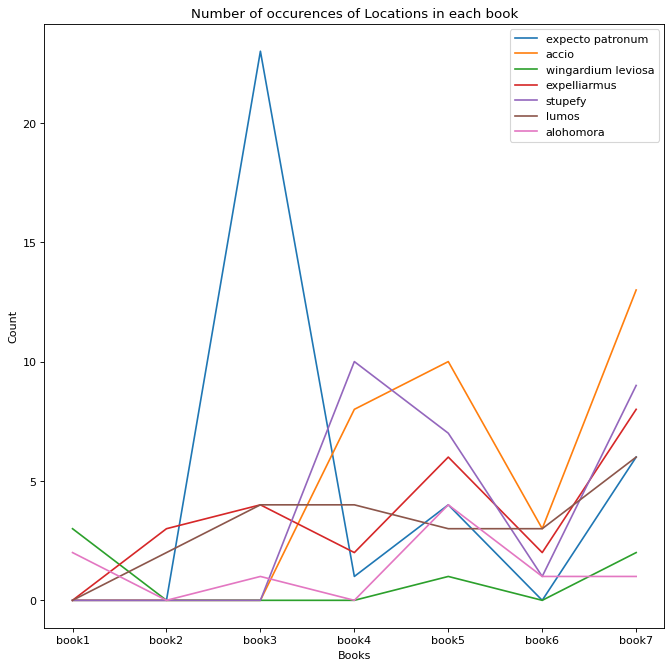

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10), dpi=80)
X = ['book1','book2','book3','book4', 'book5', 'book6', 'book7']

X_axis = np.arange(len(X))
w=0.1
plt.plot(b1,  label = 'expecto patronum')
plt.plot(b2, label = 'accio')
plt.plot(b3 , label = 'wingardium leviosa')
plt.plot(b4	, label = 'expelliarmus')
plt.plot(b5, label = 'stupefy')
plt.plot(b6, label = 'lumos')
plt.plot(b7,label = 'alohomora')



plt.xticks(X_axis, X)
plt.xlabel("Books")
plt.ylabel("Count")
plt.title("Spell count per book")
plt.legend()
plt.show()

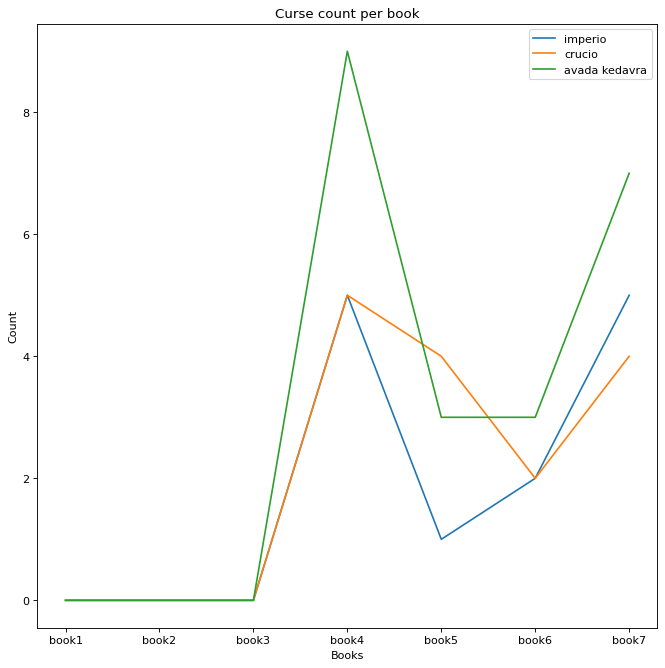

In [ ]:
plt.figure(figsize=(10, 10), dpi=80)
X = ['book1','book2','book3','book4', 'book5', 'book6', 'book7']

X_axis = np.arange(len(X))
w=0.1
plt.plot(b8,label = 'imperio')
plt.plot(b9,label = 'crucio')
plt.plot( b10,label = 'avada kedavra')

plt.xticks(X_axis, X)
plt.xlabel("Books")
plt.ylabel("Count")
plt.title("Curse count per book")
plt.legend()
plt.show()

In [ ]:
import re
b_all=[b[0].lower(),b[1].lower(),b[2].lower(),b[3].lower(),b[4].lower(),b[5].lower(),b[6].lower()]
b_cln = [re.sub('\n','',b_all[0]),re.sub('\n','',b_all[1]),re.sub('\n','',b_all[2]),re.sub('\n','',b_all[3]),re.sub('\n','',b_all[4]),re.sub('\n','',b_all[5]),re.sub('\n','',b_all[6])]
b_cln[1][:100]

'harry potter and the chamber of secretsbyj. k. rowlingillustrations by mary grandpréarthur a. levine'

In [ ]:
import string
for p in string.punctuation:
    # not removed in the corpus, as it is used to differentiate the sentences
    if p not in ['.',',']: 
        bk = [b_cln[0].replace(p,''),b_cln[1].replace(p,''),b_cln[2].replace(p,''),b_cln[3].replace(p,''),b_cln[4].replace(p,''),b_cln[5].replace(p,''),b_cln[6].replace(p,'')]

bk[0][:100]

'harry potter and the sorcerer’s stonebyj. k. rowlingillustrations by mary grandpréarthur a. levine b'

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the corpus into sentences in form of list
sentences = [sent_tokenize(bk[0]),sent_tokenize(bk[1]),sent_tokenize(bk[2]),sent_tokenize(bk[3]),sent_tokenize(bk[4]),sent_tokenize(bk[5]),sent_tokenize(bk[6])]
print(sentences[0][:100])

# length of sentences
print('\n')
s=[]
for i in range(7):
  s.append(len(sentences[i]))
  print("Total number of sentences in this book - ",len(sentences[i]))

['harry potter and the sorcerer’s stonebyj.', 'k. rowlingillustrations by mary grandpréarthur a. levine booksan imprint of scholastic press.for jessica, who loves storiesfor anne, who loved them too;and for di, who heard this one first.text copyright © 1997 by j.k. rowlingillustrations by mary grandpré copyright © 1998 warner bros.all rights reserved.', 'published by scholastic press, a division of scholastic inc.,publishers since 1920scholastic, scholastic press, and the lantern logoare trademarks and/or registered trademarks of scholastic inc.harry potter and all related characters and elements are trademarks of warner bros.no part of this publication may be reproduced, or stored in a retrieval system, or transmitted in any form or by any means, electronic, mechanical, photocopying, recording, or otherwise, without written permission of the publisher.', "for information regarding permissions, write to scholastic inc., attention: permissions department, 555 broadway, new york, ny 1001

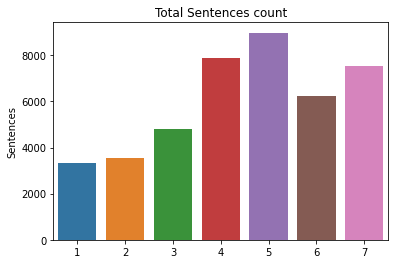

In [ ]:
import seaborn as sns
df['Sentences']=s
sns.barplot(x = [1,2,3,4,5,6,7], y ='Sentences', data = df).set_title('Total Sentences count')

plt.show()

In [ ]:
#maximum trigram
from itertools import tee, islice
from collections import Counter


def ngrams(lst, n):
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break
dd = Counter(ngrams(bk[1].split(' '), 3))
max(dd.items(), key=lambda k: k[1])

(('out', 'of', 'the'), 70)

In [ ]:
#maximum bigram
from itertools import tee, islice
from collections import Counter


def ngrams(lst, n):
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break
dd = Counter(ngrams(bk[1].split(' '), 2))
max(dd.items(), key=lambda k: k[1])

(('of', 'the'), 347)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

wd=[]
for i in range(7):
  words = word_tokenize(bk[i])
  print(words[:10])

  stop_words = list(stopwords.words('english'))
  my_stopwords = stop_words + ['.',',','“','’','”','—','...']
  words = [w for w in words if w not in my_stopwords]
  wd.append(words)
  print(words[:10])
# length of words
  print('\n')
  print("Total number of words in this book - ",len(words))

['harry', 'potter', 'and', 'the', 'sorcerer', '’', 's', 'stonebyj', '.', 'k.']
['harry', 'potter', 'sorcerer', 'stonebyj', 'k.', 'rowlingillustrations', 'mary', 'grandpréarthur', 'a.', 'levine']


Total number of words in this book -  42673
['harry', 'potter', 'and', 'the', 'chamber', 'of', 'secretsbyj', '.', 'k.', 'rowlingillustrations']
['harry', 'potter', 'chamber', 'secretsbyj', 'k.', 'rowlingillustrations', 'mary', 'grandpréarthur', 'a.', 'levine']


Total number of words in this book -  48203
['harry', 'potter', 'and', 'the', 'prisoner', 'of', 'azkabanbyj', '.', 'k.', 'rowlingillustrations']
['harry', 'potter', 'prisoner', 'azkabanbyj', 'k.', 'rowlingillustrations', 'mary', 'grandpréarthur', 'a.', 'levine']


Total number of words in this book -  61226
['harry', 'potter', 'and', 'the', 'goblet', 'of', 'firebyj', '.', 'k.', 'rowlingillustrations']
['harry', 'potter', 'goblet', 'firebyj', 'k.', 'rowlingillustrations', 'mary', 'grandpréarthur', 'a.', 'levine']


Total number of word

In [ ]:
from wordcloud import WordCloud

def create_wordCloud(words):
  comment_words =" "
  comment_words += " ".join(words)+" "

  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(comment_words)
 
# plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
 
  plt.show()

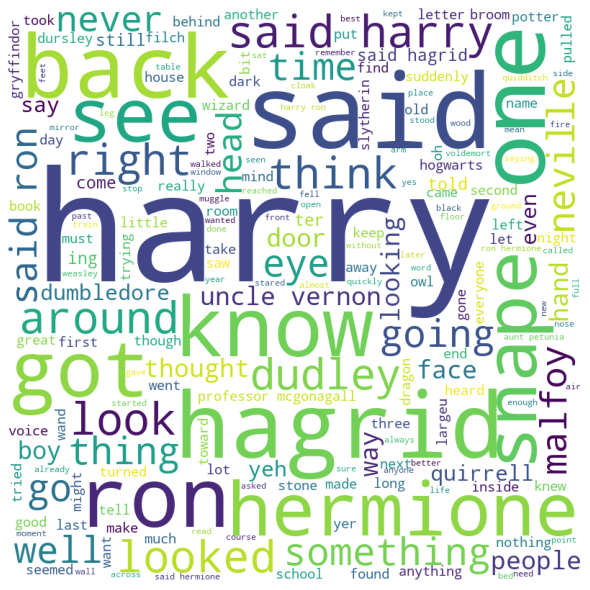

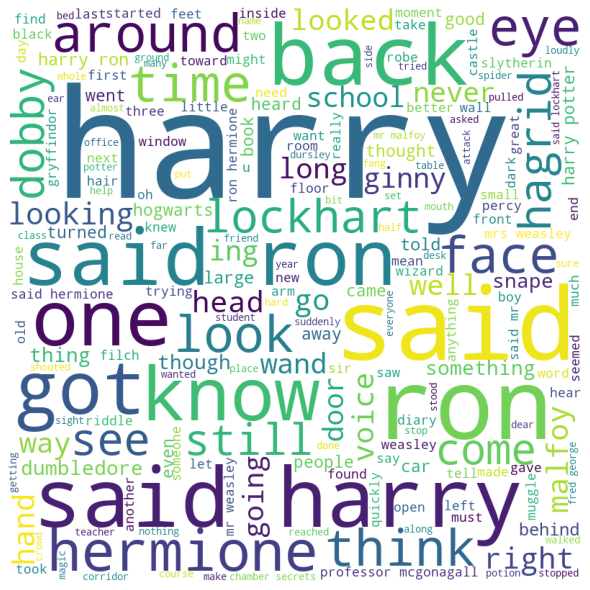

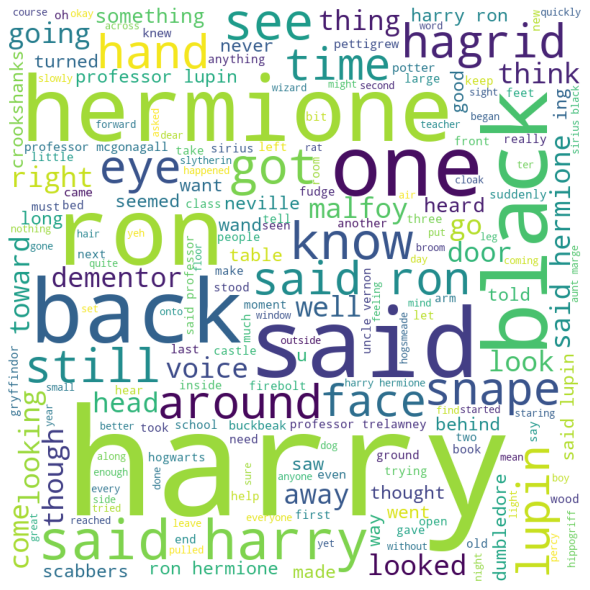

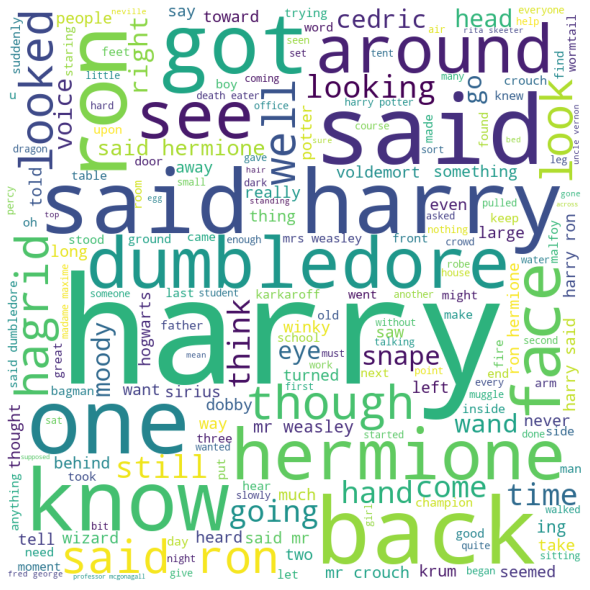

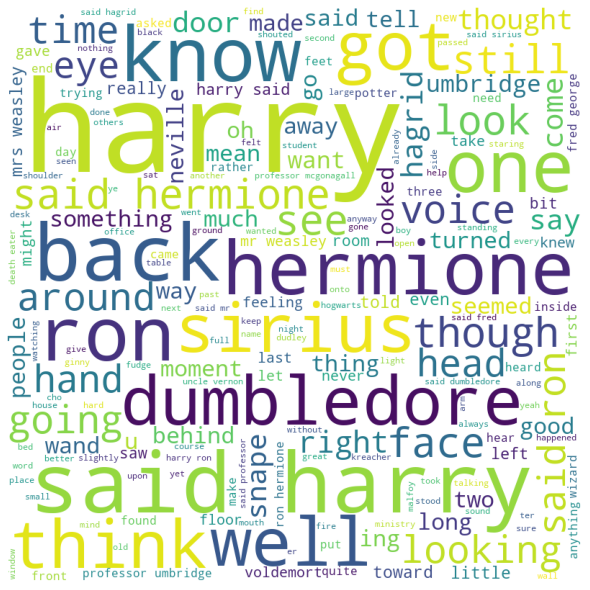

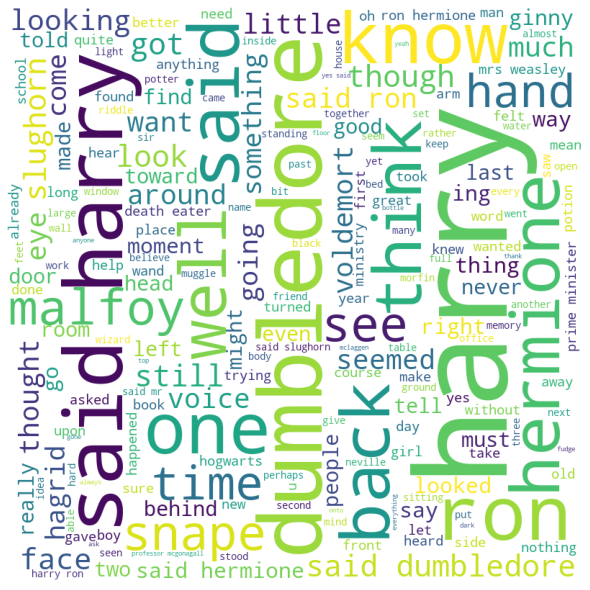

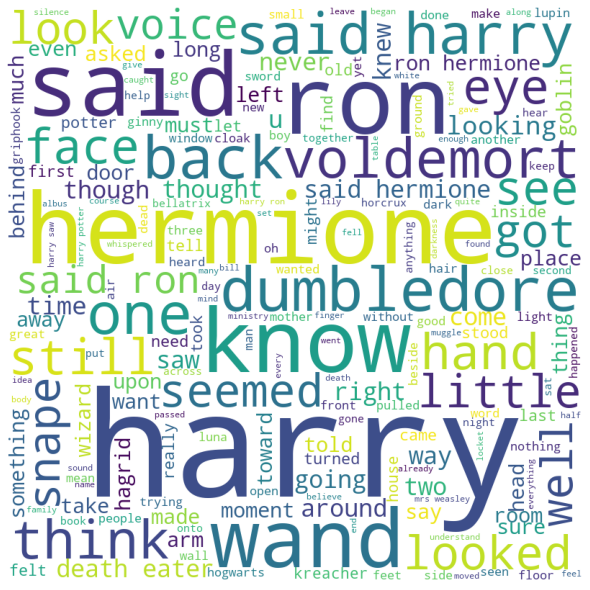

In [ ]:
for i in range(7):
  create_wordCloud(wd[i])
  print('\n')

In [ ]:
df.head()

,Books,privet drive,diagon alley,hogwarts,azkaban,ministry of magic,grimmauld place,expecto patronum,accio,wingardium leviosa,expelliarmus,stupefy,lumos,alohomora,imperio,crucio,avada kedavra,Sentences
0,book1,16,8,74,0,5,0,0,0,3,0,0,0,2,0,0,0,3310
1,book2,7,4,91,9,5,0,0,0,0,3,0,2,0,0,0,0,3559
2,book3,9,11,89,46,24,0,23,0,0,4,0,4,1,0,0,0,4820
3,book4,16,5,173,37,28,0,1,8,0,2,10,4,0,5,5,9,7864
4,book5,24,7,150,40,64,30,4,10,1,6,7,3,4,1,4,3,8975
